<a href="https://colab.research.google.com/github/bansaldhruv20/Bitcoin_price_prediction/blob/main/BitCoin_prediction_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier

#warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/BTC-Hourly.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [6]:
df.shape

(33259, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        33259 non-null  int64  
 1   date        33259 non-null  object 
 2   symbol      33259 non-null  object 
 3   open        33259 non-null  float64
 4   high        33259 non-null  float64
 5   low         33259 non-null  float64
 6   close       33259 non-null  float64
 7   Volume BTC  33259 non-null  float64
 8   Volume USD  33259 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


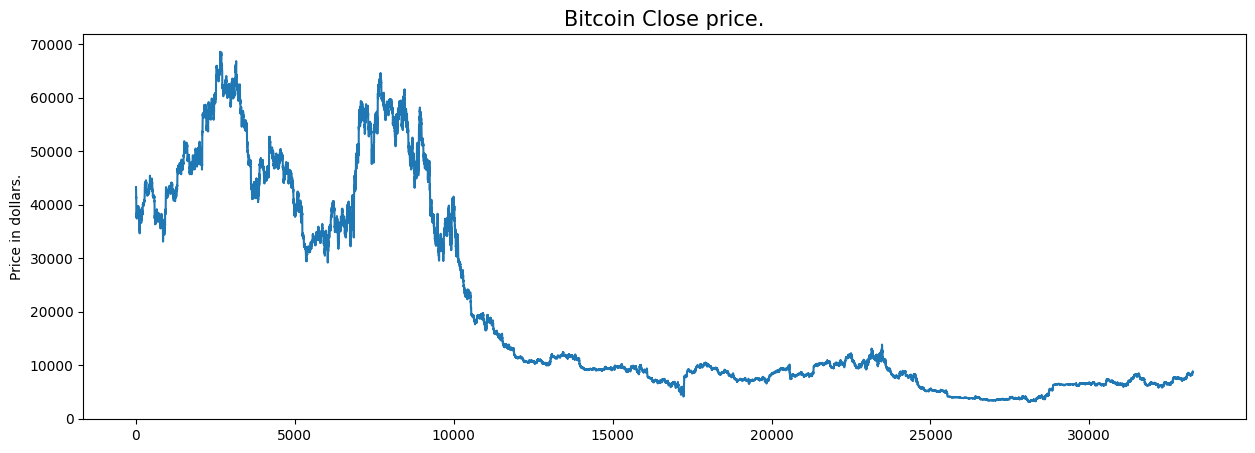

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

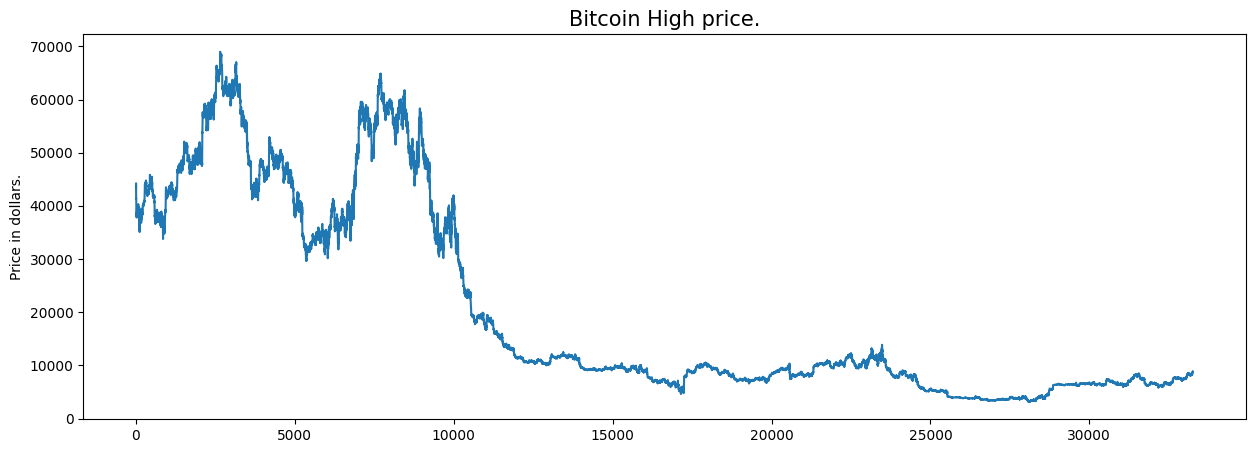

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(df['high'])
plt.title('Bitcoin High price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [12]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

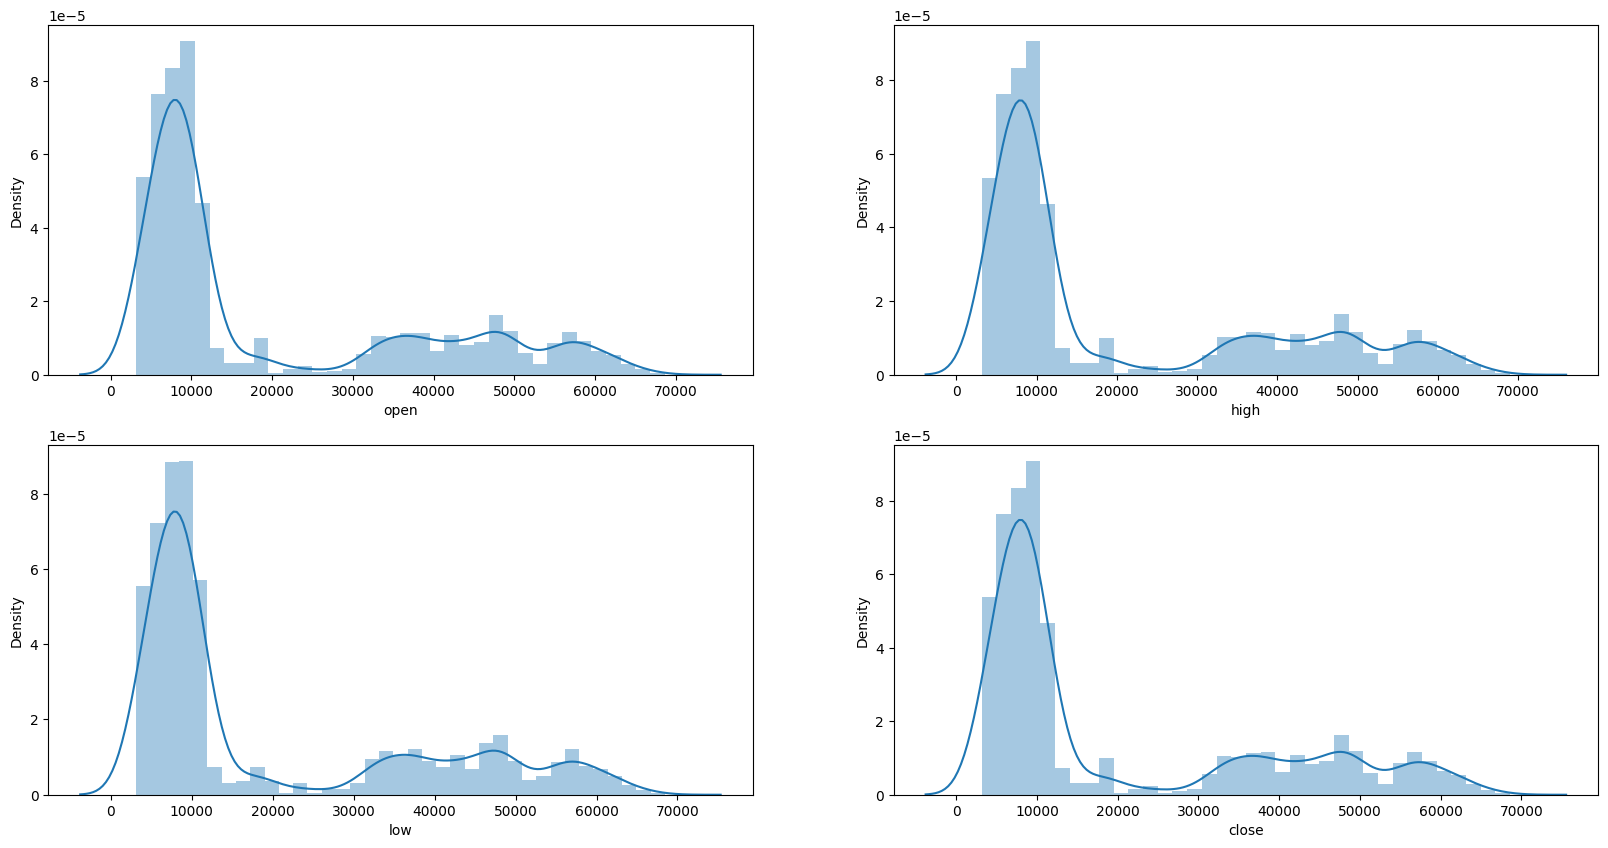

In [13]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

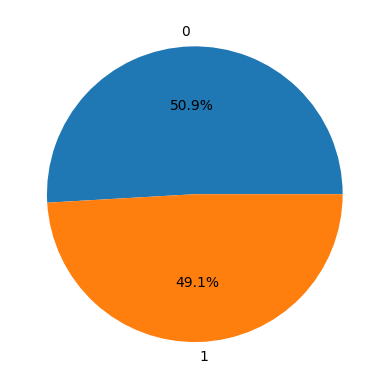

In [23]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [26]:
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(29933, 2) (3326, 2)


In [28]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.9957325725583236
Validation Accuracy :  0.9976191924370259

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9955476111078454
Validation Accuracy :  0.997557101728837

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

The XGBoost model slightly outperformed the other two, achieving a near-perfect training accuracy of 0.9997 and a validation accuracy of 0.9991. This suggests that while all models perform exceptionally well, XGBoost offers a marginally better balance of precision and generalization, making it the most reliable choice for this dataset. Overall, each model provides high accuracy, with XGBoost having a slight edge in performance.






